# Telecom-Chuern case study 

## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Goal

To Predict the customers who are about to churn from a telecom operator Business Objective is to predict the High Value Customers only We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling) Churn would be based on Usage Requirement:

1.Churn Prediction Model

2.Best Predictor Variables

## Approach

1.Data Understanding & Cleaning

2.EDA

3.Derived Metrics

4.Classification models to predict Churn (Use various Models & Handle class imbalance)

5.Model Evaluation

6.Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

7.Summarize

### Importing Libraries


In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset


In [2]:
# Reading the csv data file.
telecom_data = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Displaying the first 10 field with all columns in the dataset
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Checking the dimensions of the dataset
telecom_data.shape

(99999, 226)

In [5]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# Statistical analysis of the numercial features
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


##### This telecom dataset has 99999 rows and 226 columns

### Checking the terms used in the data from data dictionary provided.

In [7]:
# Importing the excel file of the dictionary.
telecom_data_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

# Displaying the dictionary items
telecom_data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Initial Statistical Analysis of the Data

In [8]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_data.drop(unique_1_col, axis=1, inplace = True)
print("\n Columns are dropped from the dataset as their unique value is 1 are as follows. (i.e.)It has no variance in the model.\n",
      unique_1_col)


 Columns are dropped from the dataset as their unique value is 1 are as follows. (i.e.)It has no variance in the model.
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [9]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 210)

In [10]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    arpu_9                    float64
 5    onnet_mou_6               float64
 6    onnet_mou_7               float64
 7    onnet_mou_8               float64
 8    onnet_mou_9               float64
 9    offnet_mou_6              float64
 10   offnet_mou_7              float64
 11   offnet_mou_8              float64
 12   offnet_mou_9              float64
 13   roam_ic_mou_6             float64
 14   roam_ic_mou_7             float64
 15   roam_ic_mou_8             float64
 16   roam_ic_mou_9             float64
 17   roam_og_mou_6             float64
 18   roam_og_mou_7             float64
 19   roam_og_mou_8             float64
 20   roam

**As we can see that the columns with datetime values represented as object, they can be converted into datetime format**


In [11]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

# Current dimension of the dataset
telecom_data.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [12]:
# confirming the conversion of dtype
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

### Handling missing values

In [13]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6     74.85
fb_user_6           74.85
count_rech_3g_6     74.85
count_rech_2g_6     74.85
night_pck_user_6    74.85
                    ...  
max_rech_amt_9       0.00
max_rech_amt_8       0.00
max_rech_amt_7       0.00
max_rech_amt_6       0.00
sep_vbc_3g           0.00
Length: 210, dtype: float64

#### Handling missing values of meaningful attribute column


In [14]:
# Handling missing values with respect to ` recharge` attributes
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(15)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


* Let us consider the column `date_of_last_rech_data` indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the `total_rech_data` and the `max_rech_data` also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.<br> 
* Hence imputing 0 as their values.<br>
* Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

#### Handling the missing values for the attributes `total_rech_data_*`, `max_rech_data_*` and for month 6,7,8 and 9

In [15]:
# Code for conditional imputation

for i in range(len(telecom_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i]=0
            telecom_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i]=0
            telecom_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            telecom_data['total_rech_data_8'][i]=0
            telecom_data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((telecom_data['total_rech_data_9'][i]) and (telecom_data['max_rech_data_9'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            telecom_data['total_rech_data_9'][i]=0
            telecom_data['max_rech_data_9'][i]=0

print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")

The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


#### Handling the missing values for the attributes `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [16]:
# Checking the related columns values
telecom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(15)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


*From the above tablular the column values of `total_rech_data` for each month from 6 to 9 respectively is the sum of the columns values of `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively, which derives to a multicollinearity issue with `total_rech_data`. In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` for each month from 6 to 9 respectively and `count_rech_3g` for each month from 6 to 9 respectively.*

In [17]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [18]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 202)

#### Handling the missing values for the attributes `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [19]:
# Checking the related columns values
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [20]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", telecom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

From the above correlation table between attributes `arpu_2g_*` and `arpu_3g_*` for each month from 6 to 9 respectively is highly correlated to the attribute `av_rech_amt_data_*` for each month from 6 to 9 respectively.<br> Considering the high correlation between them, it is safer to drop the attributes `arpu_2g_*` and `arpu_3g_*`.

In [21]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")



The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [22]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 194)

#### Handling the other attributes with higher missing value percentage

In [23]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
night_pck_user_6            74.85
fb_user_6                   74.85
av_rech_amt_data_7          74.43
                            ...  
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
sep_vbc_3g                   0.00
Length: 194, dtype: float64

The column `fb_user_*` and `night_pck_user_*` for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [24]:
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [25]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 186)

#### Handling the missing values for the attributes `av_rech_amt_data_*` for month 6,7,8 and 9

In [26]:
# Checking the related columns values
telecom_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(15)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


From the above tabular it is deduced that the missing values for the column `av_rech_amt_data_*` for each month from 6 to 9 can be replaced as 0 if the `total_rech_data_*` for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [27]:
# Code for conditional imputation

for i in range(len(telecom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (telecom_data['total_rech_data_9'][i]==0)):
        telecom_data['av_rech_amt_data_9'][i] = 0


print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [28]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
                            ...  
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
sep_vbc_3g                   0.00
Length: 186, dtype: float64

In [29]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 186 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

<br><br>From the above results, we can conclude, the `date_of_last_rech_data_*` corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns `total_rech_data_*`,` max_rech_data_*`are completes.<br>Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [30]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)


The columns `date_of_last_rech_data_6`,`date_of_last_rech_data_7`,`date_of_last_rech_data_8`,`date_of_last_rech_data_9` are dropped as it has no significance to the data


**As we can no more utilise the datetime column, we can drop the `date_of_last_rech_data_*` column corresponding to months 6,7,8 and 9 respectively.**

In [31]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)


The columns `date_of_last_rech_6`,`date_of_last_rech_7`,`date_of_last_rech_8`,`date_of_last_rech_9` are dropped as it has no significance to the data


In [32]:
# The curent dimensions of the dataset
telecom_data.shape

(99999, 178)

***Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column***

### Filtering the High Value Customer from Good Phase


#### Define high-value customers as follows:

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [33]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average recharge amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [34]:
# The curent dimension of the dataset
telecom_data.shape

(30001, 183)

The total number of customers is now limited to ~30k who lies under the High Value customer criteria basen upon which the model is built.

In [35]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

In [36]:
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_data_missing_columns

,null
loc_ic_t2f_mou_9,6.34
spl_og_mou_9,6.34
loc_og_t2m_mou_9,6.34
loc_og_t2f_mou_9,6.34
loc_ic_t2t_mou_9,6.34
...,...
max_rech_amt_8,0.00
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [37]:
# Listing the columns of MOU Sep(9)
print(((telecom_data_missing_columns[telecom_data_missing_columns['null'] == 6.34]).index).to_list())

['loc_ic_t2f_mou_9', 'spl_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_ic_t2t_mou_9', 'isd_og_mou_9', 'loc_og_t2t_mou_9', 'loc_ic_t2m_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'roam_ic_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'offnet_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2f_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'loc_og_mou_9', 'isd_ic_mou_9', 'std_og_t2m_mou_9', 'ic_others_9', 'og_others_9']


In [38]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
telecom_data_null_mou_9 = ((telecom_data_missing_columns[telecom_data_missing_columns['null'] == 6.34]).index).to_list()

In [39]:
 telecom_data_null_mou_9 = telecom_data[(telecom_data['loc_ic_t2f_mou_9'].isnull())&(telecom_data['spl_og_mou_9'].isnull())&
                            (telecom_data['loc_og_t2m_mou_9'].isnull())&(telecom_data['loc_og_t2f_mou_9'].isnull())&
                            (telecom_data['loc_ic_t2t_mou_9'].isnull())&(telecom_data['isd_og_mou_9'].isnull())&
                            (telecom_data['loc_og_t2t_mou_9'].isnull())& (telecom_data['loc_ic_t2m_mou_9'].isnull())&
                            (telecom_data['std_og_t2t_mou_9'].isnull())& (telecom_data['roam_og_mou_9'].isnull())&
                            (telecom_data['std_og_mou_9'].isnull())&(telecom_data['loc_ic_mou_9'].isnull())&
                            (telecom_data['std_ic_t2t_mou_9'].isnull())&(telecom_data['roam_ic_mou_9'].isnull())&
                            (telecom_data['loc_og_t2c_mou_9'].isnull())&(telecom_data['std_ic_t2m_mou_9'].isnull())&
                            (telecom_data['offnet_mou_9'].isnull())&(telecom_data['std_ic_t2f_mou_9'].isnull())&
                            (telecom_data['std_og_t2f_mou_9'].isnull())&(telecom_data['std_ic_mou_9'].isnull())&
                            (telecom_data['onnet_mou_9'].isnull())&(telecom_data['spl_ic_mou_9'].isnull())&
                            (telecom_data['loc_og_mou_9'].isnull())&(telecom_data['isd_ic_mou_9'].isnull())&
                            (telecom_data['std_og_t2m_mou_9'].isnull())&(telecom_data['ic_others_9'].isnull())&
                            (telecom_data['og_others_9'].isnull())]
telecom_data_null_mou_9.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,968,30.40,0.00,101.20,3.58,252.00,252.0,614.00,504.0,559.00
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,802,57.74,19.38,18.74,0.00,0.00,0.0,1580.00,790.0,1185.00
67,7000800341,218.818,386.515,386.502,0.000,0.00,0.00,0.00,NaN,0.00,...,1158,126.21,745.73,1010.15,0.00,252.00,455.0,504.00,910.0,707.00
86,7000175867,319.700,56.080,1.030,0.000,141.76,11.23,0.00,NaN,182.76,...,465,0.00,394.62,1526.51,0.00,616.00,0.0,946.00,110.0,528.00
111,7001300706,596.301,146.073,0.000,0.000,55.19,3.26,NaN,NaN,45.51,...,332,0.00,0.00,0.00,0.00,406.00,0.0,1110.00,178.0,644.00
188,7000340381,734.641,183.668,0.000,0.000,4.38,0.98,NaN,NaN,105.16,...,244,0.00,831.48,1223.04,0.00,1008.00,0.0,1872.00,120.0,996.00
320,7000959346,1415.186,1754.735,229.575,-1.000,120.19,236.14,1.71,NaN,2082.18,...,896,0.00,0.00,0.00,0.00,0.00,0.0,1634.00,2023.0,1828.50
358,7002255278,688.670,205.780,707.910,-5.000,68.34,38.93,NaN,NaN,550.18,...,2597,1.22,17.89,383.36,0.00,154.00,154.0,1154.00,654.0,904.00
428,7001539992,157.696,99.510,57.071,0.000,2.76,22.66,4.10,NaN,12.39,...,713,0.00,0.00,0.00,0.00,799.92,400.0,979.92,524.0,751.96
435,7000884629,438.017,624.072,351.184,735.324,0.00,0.00,0.00,NaN,4.01,...,749,615.50,552.17,78.26,0.00,455.00,1008.0,910.00,1512.0,1211.00


In [40]:
#Deleting the records for which MOU for Sep(9) are null
telecom_data= telecom_data.drop(telecom_data_null_mou_9.index)

In [41]:
# Again Cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_data_missing_columns

,null
og_others_6,0.8
loc_og_t2f_mou_6,0.8
loc_ic_mou_6,0.8
std_og_t2m_mou_6,0.8
loc_ic_t2f_mou_6,0.8
...,...
std_ic_t2m_mou_9,0.0
std_ic_t2t_mou_9,0.0
arpu_6,0.0
loc_ic_mou_9,0.0


Looks like MOU for all the types of calls for the month of jun (6) have missing values together for any particular record.

Lets check the records for the MOU for jun(6), in which these coulmns have missing values together.

In [42]:
# Listing the columns of MOU jun(8)
print(((telecom_data_missing_columns[telecom_data_missing_columns['null'] == 0.8]).index).to_list())

['og_others_6', 'loc_og_t2f_mou_6', 'loc_ic_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_6', 'spl_og_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 'isd_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'std_og_t2f_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'ic_others_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6']


In [43]:
# Creating a dataframe with the condition, in which MOU for jun(6) are null
telecom_data_null = telecom_data[(telecom_data['og_others_6'].isnull())&(telecom_data['loc_og_t2f_mou_6'].isnull())&
                            (telecom_data['loc_ic_mou_6'].isnull())&(telecom_data['std_og_t2m_mou_6'].isnull())&
                            (telecom_data['loc_ic_t2f_mou_6'].isnull())&(telecom_data['loc_og_t2m_mou_6'].isnull())&
                            (telecom_data['loc_ic_t2m_mou_6'].isnull())& (telecom_data['loc_ic_t2t_mou_6'].isnull())&
                            (telecom_data['spl_og_mou_6'].isnull())& (telecom_data['roam_og_mou_6'].isnull())&
                            (telecom_data['loc_og_t2c_mou_6'].isnull())&(telecom_data['isd_og_mou_6'].isnull())&
                            (telecom_data['loc_og_mou_6'].isnull())&(telecom_data['std_og_mou_6'].isnull())&
                            (telecom_data['std_og_t2f_mou_6'].isnull())&(telecom_data['std_og_t2t_mou_6'].isnull())&
                            (telecom_data['std_ic_t2t_mou_6'].isnull())&(telecom_data['loc_og_t2t_mou_6'].isnull())&
                            (telecom_data['std_ic_t2m_mou_6'].isnull())&(telecom_data['std_ic_t2f_mou_6'].isnull())&
                            (telecom_data['ic_others_6'].isnull())&(telecom_data['roam_ic_mou_6'].isnull())&
                            (telecom_data['onnet_mou_6'].isnull())&(telecom_data['offnet_mou_6'].isnull())&
                            (telecom_data['isd_ic_mou_6'].isnull())&(telecom_data['spl_ic_mou_6'].isnull())&
                            (telecom_data['loc_og_t2t_mou_6'].isnull())]
telecom_data_null.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
77,7001328263,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,...,1894,0.00,0.00,0.00,0.00,0.0,154.0,0.0,1308.0,654.0
364,7002168045,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,...,424,0.00,0.00,0.00,0.00,0.0,154.0,0.0,1124.0,562.0
414,7000919353,20.000,290.490,132.698,199.047,NaN,23.56,15.66,1.96,NaN,...,429,0.00,0.00,0.00,0.00,0.0,744.0,0.0,1083.0,541.5
423,7000635248,213.802,304.194,149.710,329.643,NaN,0.00,0.00,0.00,NaN,...,945,73.55,266.94,63.04,0.00,252.0,252.0,504.0,843.0,673.5
934,7002152278,48.000,764.152,500.030,194.400,NaN,14.24,17.48,7.69,NaN,...,490,188.83,215.00,0.00,24.18,0.0,252.0,0.0,1554.0,777.0
1255,7002100573,0.000,466.085,574.172,29.000,NaN,22.49,37.84,1.06,NaN,...,1279,162.90,93.49,0.00,0.00,0.0,252.0,0.0,1632.0,816.0
2285,7000278047,213.815,213.793,213.791,432.586,NaN,NaN,NaN,0.00,NaN,...,420,3.57,3.40,49.32,0.00,252.0,252.0,504.0,504.0,504.0
2516,7000084212,88.371,64.427,39.716,141.414,NaN,NaN,0.00,1.45,NaN,...,193,0.00,0.00,0.00,0.00,1600.0,356.0,1700.0,430.0,1065.0
2719,7002002857,0.000,1059.113,847.835,232.540,NaN,1448.16,148.18,52.28,NaN,...,214,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1241.0,620.5
3290,7000679545,213.813,213.844,213.807,213.802,NaN,NaN,NaN,0.00,NaN,...,263,271.75,0.00,0.00,0.00,252.0,252.0,504.0,504.0,504.0


In [44]:
# Deleting the records for which MOU for jun(6) are null
telecom_data = telecom_data.drop(telecom_data_null.index)

In [45]:
# Again cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_data_missing_columns

,null
std_ic_t2t_mou_8,0.63
spl_og_mou_8,0.63
og_others_8,0.63
loc_og_t2m_mou_8,0.63
loc_ic_t2t_mou_8,0.63
...,...
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_9,0.00
og_others_6,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [46]:
# Listing the columns of MOU Aug(8)
print(((telecom_data_missing_columns[telecom_data_missing_columns['null'] == 0.63]).index).to_list())

['std_ic_t2t_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'isd_og_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'roam_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'roam_ic_mou_8', 'std_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'offnet_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'onnet_mou_8', 'loc_og_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'std_og_t2m_mou_8', 'isd_ic_mou_8', 'loc_og_t2f_mou_8']


In [47]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
telecom_data_null_8= telecom_data[(telecom_data['og_others_8'].isnull())&(telecom_data['loc_og_t2f_mou_8'].isnull())&
                            (telecom_data['loc_ic_mou_8'].isnull())&(telecom_data['std_og_t2m_mou_8'].isnull())&
                            (telecom_data['loc_ic_t2f_mou_8'].isnull())&(telecom_data['loc_og_t2m_mou_8'].isnull())&
                            (telecom_data['loc_ic_t2m_mou_8'].isnull())& (telecom_data['loc_ic_t2t_mou_8'].isnull())&
                            (telecom_data['spl_og_mou_8'].isnull())& (telecom_data['roam_og_mou_8'].isnull())&
                            (telecom_data['loc_og_t2c_mou_8'].isnull())&(telecom_data['isd_og_mou_8'].isnull())&
                            (telecom_data['loc_og_mou_8'].isnull())&(telecom_data['std_og_mou_8'].isnull())&
                            (telecom_data['std_og_t2f_mou_8'].isnull())&(telecom_data['std_og_t2t_mou_8'].isnull())&
                            (telecom_data['std_ic_t2t_mou_8'].isnull())&(telecom_data['loc_og_t2t_mou_8'].isnull())&
                            (telecom_data['std_ic_t2m_mou_8'].isnull())&(telecom_data['std_ic_t2f_mou_8'].isnull())&
                            (telecom_data['ic_others_8'].isnull())&(telecom_data['roam_ic_mou_8'].isnull())&
                            (telecom_data['onnet_mou_8'].isnull())&(telecom_data['offnet_mou_8'].isnull())&
                            (telecom_data['isd_ic_mou_8'].isnull())&(telecom_data['spl_ic_mou_8'].isnull())&
                            (telecom_data['loc_og_t2t_mou_8'].isnull())]
telecom_data_null_8.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
788,7000636808,532.742,546.756,0.000,269.274,1173.39,891.83,NaN,149.34,61.59,...,936,0.00,0.00,0.00,0.0,0.0,0.0,714.0,494.0,604.0
1138,7000069975,405.189,61.136,140.144,224.626,26.81,NaN,NaN,0.00,519.28,...,212,716.21,779.19,147.47,0.0,1359.0,49.0,1857.0,98.0,977.5
1623,7000494286,198.890,129.494,0.000,261.423,0.00,0.46,NaN,0.00,0.00,...,383,0.00,15.79,0.00,0.0,8100.0,1225.0,8325.0,1375.0,4850.0
1877,7001874888,50.779,103.074,-5.000,47.149,0.00,0.00,NaN,10.54,35.24,...,1335,0.00,0.00,0.00,0.0,25.0,852.0,50.0,969.0,509.5
2063,7002171198,248.434,165.596,248.347,412.868,0.00,0.00,NaN,0.00,0.00,...,331,0.00,0.00,0.00,0.0,882.0,392.0,1176.0,588.0,882.0
2197,7001243228,372.679,202.302,-3.000,16.049,115.28,4.63,NaN,0.00,85.73,...,444,0.00,78.07,0.00,0.0,1512.0,68.0,1956.0,282.0,1119.0
3289,7000008339,136.651,7.900,0.000,0.000,0.00,NaN,NaN,0.00,0.00,...,200,19.79,291.08,443.76,0.0,608.0,608.0,774.0,608.0,691.0
3364,7001547362,45.490,104.785,-0.500,0.500,0.00,0.00,NaN,0.00,0.00,...,1006,0.00,0.00,0.00,0.0,153.0,1372.0,204.0,1493.0,848.5
4402,7000440665,218.252,233.524,0.160,3.440,0.00,0.00,NaN,0.00,0.00,...,748,20.36,215.32,186.17,0.0,252.0,252.0,534.0,504.0,519.0
5111,7001696021,360.232,532.158,96.904,366.272,106.58,77.79,NaN,54.41,177.81,...,2372,0.00,0.00,0.00,0.0,145.0,0.0,600.0,653.0,626.5


In [48]:
# Deleting the records for which MOU for Aug(8) are null
telecom_data = telecom_data.drop(telecom_data_null_8.index)

In [49]:
# Again cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_data_missing_columns

,null
std_ic_mou_7,0.25
std_ic_t2t_mou_7,0.25
loc_ic_t2t_mou_7,0.25
loc_og_t2c_mou_7,0.25
std_og_t2t_mou_7,0.25
...,...
total_og_mou_7,0.00
total_og_mou_8,0.00
total_og_mou_9,0.00
loc_ic_t2t_mou_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [50]:
# Listing the columns of MOU Jul(7)
print(((telecom_data_missing_columns[telecom_data_missing_columns['null'] == 0.25]).index).to_list())

['std_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_og_t2f_mou_7', 'isd_og_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7', 'ic_others_7', 'std_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'loc_ic_mou_7', 'roam_og_mou_7', 'isd_ic_mou_7', 'og_others_7', 'loc_og_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2f_mou_7', 'std_ic_t2m_mou_7', 'offnet_mou_7', 'spl_ic_mou_7', 'std_og_mou_7', 'roam_ic_mou_7', 'spl_og_mou_7', 'onnet_mou_7']


In [51]:
# Creating a dataframe with the condition, in which MOU for Aug(7) are null
telecom_data_null_7= telecom_data[(telecom_data['og_others_7'].isnull())&(telecom_data['loc_og_t2f_mou_7'].isnull())&
                            (telecom_data['loc_ic_mou_7'].isnull())&(telecom_data['std_og_t2m_mou_7'].isnull())&
                            (telecom_data['loc_ic_t2f_mou_7'].isnull())&(telecom_data['loc_og_t2m_mou_7'].isnull())&
                            (telecom_data['loc_ic_t2m_mou_7'].isnull())& (telecom_data['loc_ic_t2t_mou_7'].isnull())&
                            (telecom_data['spl_og_mou_7'].isnull())& (telecom_data['roam_og_mou_7'].isnull())&
                            (telecom_data['loc_og_t2c_mou_7'].isnull())&(telecom_data['isd_og_mou_7'].isnull())&
                            (telecom_data['loc_og_mou_7'].isnull())&(telecom_data['std_og_mou_7'].isnull())&
                            (telecom_data['std_og_t2f_mou_7'].isnull())&(telecom_data['std_og_t2t_mou_7'].isnull())&
                            (telecom_data['std_ic_t2t_mou_7'].isnull())&(telecom_data['loc_og_t2t_mou_7'].isnull())&
                            (telecom_data['std_ic_t2m_mou_7'].isnull())&(telecom_data['std_ic_t2f_mou_7'].isnull())&
                            (telecom_data['ic_others_7'].isnull())&(telecom_data['roam_ic_mou_7'].isnull())&
                            (telecom_data['onnet_mou_7'].isnull())&(telecom_data['offnet_mou_7'].isnull())&
                            (telecom_data['isd_ic_mou_7'].isnull())&(telecom_data['spl_ic_mou_7'].isnull())&
                            (telecom_data['loc_og_t2t_mou_7'].isnull())]
telecom_data_null_7.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
2452,7001556991,124.215,232.220,130.427,148.291,0.00,NaN,0.00,0.00,0.00,...,1165,0.00,0.00,0.00,0.00,900.0,825.0,1050.0,1100.0,1075.0
2533,7000425942,130.450,220.876,130.413,148.293,0.00,NaN,0.00,0.00,0.00,...,710,0.00,0.00,0.00,0.00,154.0,2632.0,308.0,2886.0,1597.0
3310,7000341220,240.199,240.143,205.766,173.259,0.00,NaN,0.00,0.00,0.00,...,1064,0.00,0.00,0.00,0.00,2009.0,2009.0,2296.0,2296.0,2296.0
4439,7001049672,163.846,189.673,0.000,0.000,0.00,NaN,0.00,0.00,5.03,...,642,0.00,553.04,1319.05,0.00,880.0,916.0,1075.0,1145.0,1110.0
5025,7001688880,129.030,130.743,130.732,214.300,0.00,NaN,0.00,0.00,0.75,...,185,368.84,439.15,133.67,0.00,608.0,154.0,760.0,308.0,534.0
5616,7001238202,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,...,576,63.38,0.00,0.00,163.39,0.0,0.0,776.0,780.0,778.0
9451,7001477649,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,...,672,0.00,0.00,0.00,0.00,342.0,0.0,1548.0,0.0,774.0
9955,7001658068,925.028,189.000,789.761,445.707,46.39,NaN,43.39,56.61,333.78,...,3107,0.00,0.00,0.00,0.00,0.0,0.0,1385.0,0.0,692.5
10477,7000087044,287.906,132.245,154.119,274.483,0.15,NaN,3.08,0.00,0.08,...,187,0.00,0.00,0.00,0.00,616.0,154.0,954.0,338.0,646.0
10724,7001391499,894.818,85.000,207.040,363.314,117.21,NaN,97.01,35.43,119.79,...,2664,0.00,0.00,0.00,0.00,0.0,0.0,1020.0,0.0,510.0


In [52]:
# Deleting the records for which MOU for Jul(7) are null
telecom_data = telecom_data.drop(telecom_data_null_7.index)

In [53]:
# Again cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_data_missing_columns

,null
mobile_number,0.0
isd_ic_mou_8,0.0
ic_others_6,0.0
ic_others_7,0.0
ic_others_8,0.0
...,...
spl_og_mou_8,0.0
spl_og_mou_9,0.0
og_others_6,0.0
og_others_7,0.0


#### We can see there are no more missing values in any columns.

### ***Defining Churn  variable***


As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` and `vol_3g_mb_9` attributes

In [54]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
telecom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27629 entries, 8 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  27629 non-null  float64
 1   total_og_mou_9  27629 non-null  float64
 2   vol_2g_mb_9     27629 non-null  float64
 3   vol_3g_mb_9     27629 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [55]:
# Initializing the churn variable.
telecom_data['churn']=0

# Imputing the churn values based on the condition
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [56]:
# Checking the top 10 data
telecom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,21.03,910.65,122.16,0.0,0.0,354.0,437.0,955.0,696.0,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,640.0,0
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,40.45,51.86,0.00,0.0,0.0,712.0,0.0,1166.0,583.0,0
33,7000149764,977.020,2362.833,409.230,799.356,0.00,0.00,0.00,0.00,0.00,...,358.10,2706.83,1714.67,0.0,5285.0,20424.0,6343.0,23230.0,14786.5,0
38,7000815202,363.987,486.558,393.909,391.709,248.99,619.96,666.38,494.79,88.86,...,0.00,0.00,0.00,0.0,0.0,0.0,420.0,636.0,528.0,0
41,7000721289,482.832,425.764,229.769,143.596,86.39,118.88,80.44,40.06,232.36,...,0.00,0.00,0.00,0.0,0.0,0.0,496.0,510.0,503.0,0
48,7000294396,1873.271,575.927,179.218,1189.744,2061.69,881.43,156.91,1589.23,1087.76,...,0.00,0.00,0.00,0.0,0.0,0.0,2317.0,580.0,1448.5,0
53,7002188521,978.077,1141.296,706.020,1076.247,135.14,119.59,102.69,99.83,479.31,...,0.00,0.00,0.00,0.0,344.0,575.0,1503.0,1947.0,1725.0,0
56,7002180748,452.624,320.548,368.807,281.710,34.46,43.11,50.61,27.49,131.59,...,277.97,535.63,1459.45,0.0,616.0,3600.0,1144.0,3980.0,2562.0,0
57,7001682585,1201.298,687.704,602.052,1529.608,61.23,7.39,62.89,119.44,165.41,...,1799.09,3649.39,1892.32,0.0,5244.0,655.0,6633.0,1560.0,4096.5,0


0    97.245648
1     2.754352
Name: churn, dtype: float64


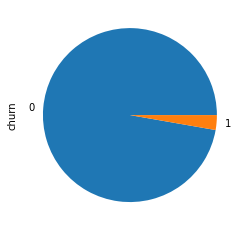

In [57]:
# lets find out churn/non churn percentage
print((telecom_data['churn'].value_counts()/len(telecom_data))*100)
((telecom_data['churn'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 97% of the customers do not churn, there is a class of imbalance*** 

Since this variable `churn` is the target variable, all the columns relating to this variable(i.e. all columns with suffix `_9`) can be dropped forn the dataset.

In [58]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in telecom_data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [59]:
# Dropping the selected churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_data.shape

(27629, 141)

We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.


In [60]:
# telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
# telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7,8 and 9
# telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
# telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

*We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.*

**Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.**

In [61]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]
mon_8_cols = [col for col in telecom_data.columns if '_8' in col]

In [62]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

isd_og_mou_8      isd_og_mou_7          0.960894
                  isd_og_mou_6          0.954178
total_rech_amt_8  arpu_8                0.953891
isd_og_mou_7      isd_og_mou_6          0.953439
sachet_2g_8       total_rech_data_8     0.900832
total_ic_mou_6    loc_ic_mou_6          0.894057
total_ic_mou_8    loc_ic_mou_8          0.893515
avg_rech_amt_6_7  overall_rech_amt_7    0.884278
total_ic_mou_7    loc_ic_mou_7          0.882852
std_og_t2t_mou_8  onnet_mou_8           0.856492
std_og_t2t_mou_6  onnet_mou_6           0.854150
std_og_t2t_mou_7  onnet_mou_7           0.853928
std_og_t2m_mou_7  offnet_mou_7          0.851457
loc_ic_mou_8      loc_ic_mou_7          0.850913
std_og_t2m_mou_8  offnet_mou_8          0.850075
loc_og_mou_8      loc_og_mou_7          0.848999
total_og_mou_8    std_og_mou_8          0.847702
std_ic_mou_8      std_ic_t2m_mou_8      0.844784
total_og_mou_7    std_og_mou_7          0.844397
loc_ic_mou_8      loc_ic_t2m_mou_8      0.843588
avg_rech_amt_6_7  ov

In [63]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_data.drop(col_to_drop, axis=1, inplace=True)

In [64]:
# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(27629, 121)

### Deriving new variables to understand the data


In [65]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

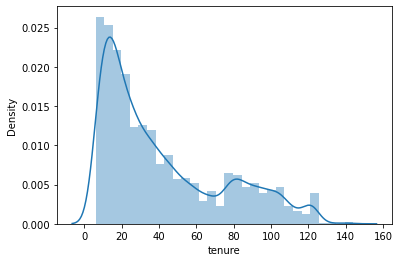

In [66]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

In [67]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
38        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

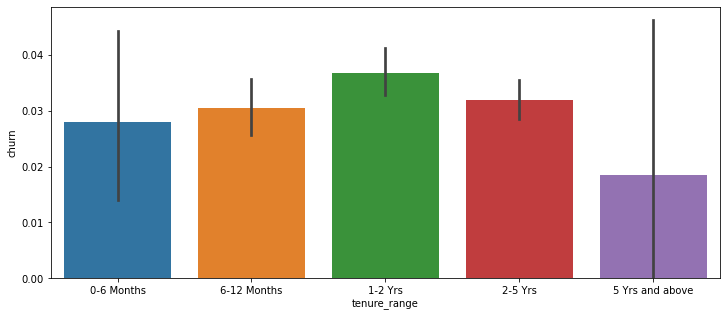

In [68]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,5])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

**It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.**

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [69]:
telecom_data["avg_arpu_6_7"]= (telecom_data['arpu_6']+telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

8      435.4720
21     556.1030
23     134.1235
33    1669.9265
38     425.2725
Name: avg_arpu_6_7, dtype: float64

In [70]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

telecom_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
telecom_data.shape

(27629, 121)

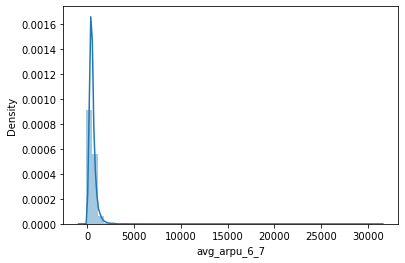

In [71]:
# Visualizing the column created
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

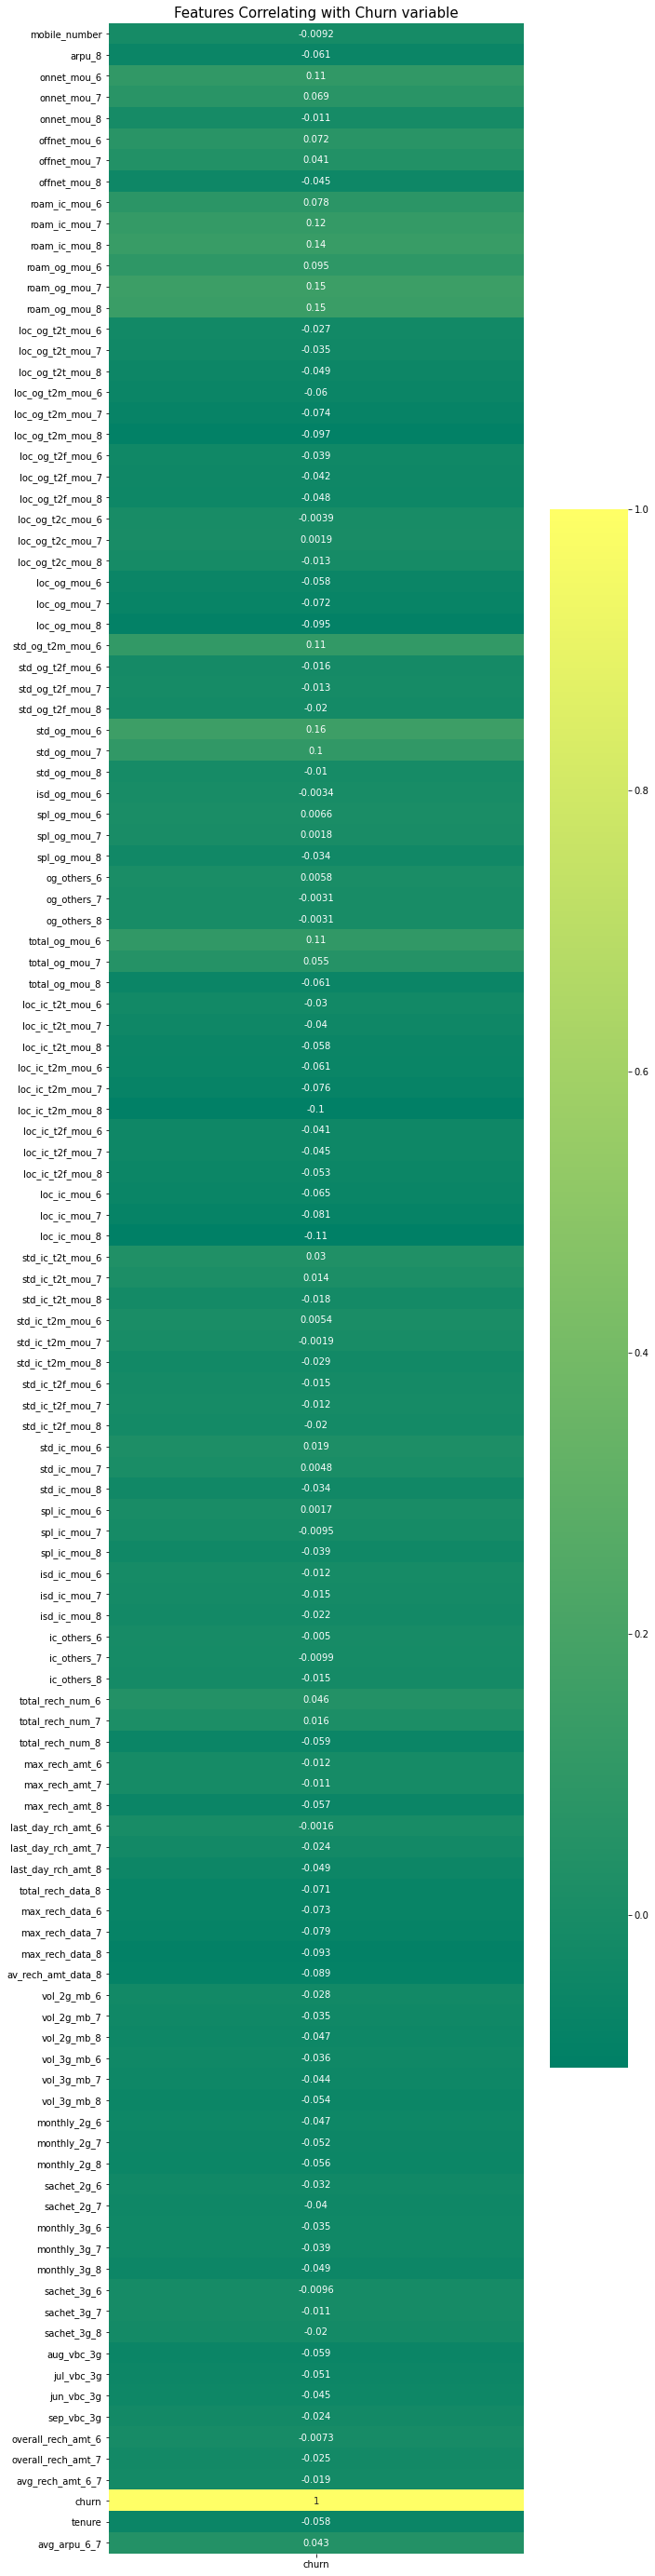

In [72]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_data.corr()[['churn']],annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

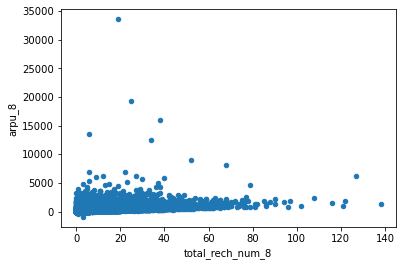

In [73]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

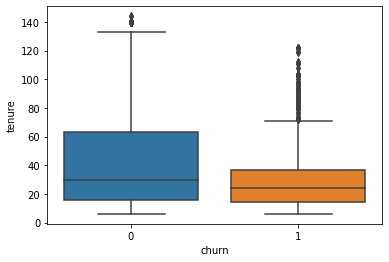

In [74]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

**From the above plot , its clear tenured customers do no churn and they keep availing telecom services**

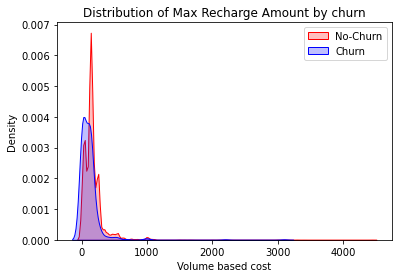

In [75]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

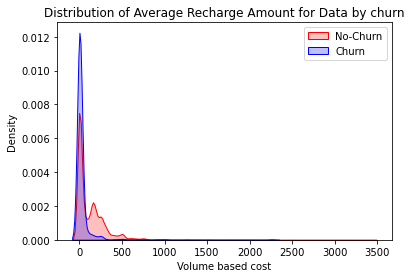

In [76]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.av_rech_amt_data_8[(telecom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [77]:
# Creating categories for month 8 column totalrecharge and their count
telecom_data['total_rech_data_group_8']=pd.cut(telecom_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_8']=pd.cut(telecom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])


 Distribution of total_rech_data_8 variable
 <=10_Recharges     14543
No_Recharge        12462
10-25_Recharges      586
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


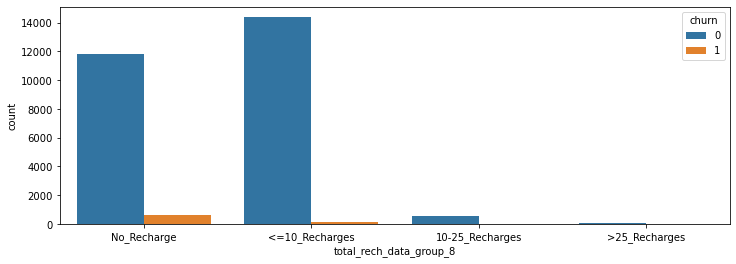


 Distribution of total_rech_num_8 variable
 <=10_Recharges     17541
10-25_Recharges     8060
>25_Recharges       1784
No_Recharge          244
Name: total_rech_num_group_8, dtype: int64


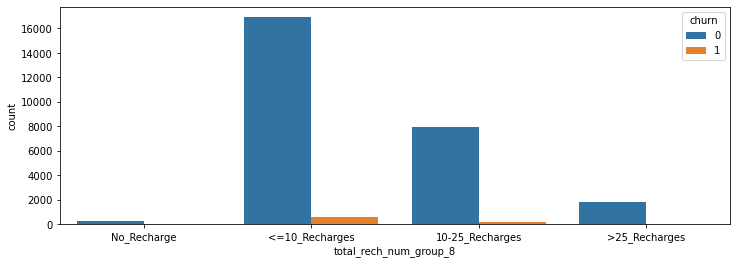

In [78]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_8",hue="churn")
print("\n Distribution of total_rech_data_8 variable\n",telecom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_8",hue="churn")
print("\n Distribution of total_rech_num_8 variable\n",telecom_data['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [79]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0
33,1,0,0,1,0,0,0,0,1,0
38,0,0,0,1,0,0,0,0,1,0


In [80]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
8,7001524846,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
21,7002124215,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
23,7000887461,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
38,7000815202,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
# Creating a copy of the filtered dataframe

df=telecom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [82]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
38,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [83]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [84]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0
38,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [85]:
# lets create y dataset for model building.
y=df['churn']
y.head()

8     0
21    0
23    0
33    0
38    0
Name: churn, dtype: int32

In [86]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19340, 126)
Dimension of X_test: (8289, 126)


In [87]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19340 entries, 3038 to 909
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   loc

In [88]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

## Feature Scaling

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [89]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [90]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
3038,0.123444,0.390829,0.232907,0.104381,0.128964,0.078579,0.104148,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
82180,0.072858,0.000000,0.033093,0.001985,0.007170,0.175542,0.017825,0.000501,0.000454,0.000000,...,1,0,0,0,1,0,0,1,0,0
35115,0.066747,0.087486,0.066338,0.007553,0.018100,0.020617,0.004031,0.000000,0.001490,0.008053,...,0,0,0,1,0,0,0,1,0,0
44721,0.094706,0.076483,0.064746,0.051967,0.133827,0.104112,0.103512,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
86651,0.060916,0.004787,0.000318,0.001856,0.021532,0.004651,0.008148,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0


### Data Imbalance Handling

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [91]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [92]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (37610, 126)
Dimension of y_train_sm Shape: (37610,)


### Logistic Regression

In [93]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [94]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37610
Model:                            GLM   Df Residuals:                    37484
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 30 Mar 2022   Deviance:                       22223.
Time:                        21:21:16   Pearson chi2:                 5.46e+05
No. Iterations:                    40                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.9431      0.225      8.632      0.000       1.502       2.384
arpu_8                                     -5.2507      3.369     -1.558      0.119     -11.854       1.353
onnet_mou_6                               158.7809     51.107      3.107      0.002      58.613     258.949
onnet_mou_7                               153.0794     34.202      4.476      0.000      86.045     220.114
onnet_mou_8                              -139.2885     66.300     -2.101      0.036    -269.234      -9.343
offnet_mou_6                              187.9787     57.820      3.251      0.001      74.654     301.304
offnet_mou_7                              200.6134     42.657      4.703      0.000     117.007     284.219
offnet_mou_8                             -188.7264     86.342     -2.186      0.029    -357.954     -19.499
roam_ic_mou_6                               0.2262      0.852      0.266      0.791      -1.443       1.895
roam_ic_mou_7                               8.4850      1.609      5.273      0.000       5.331      11.639
roam_ic_mou_8                               5.6284      1.509      3.731      0.000       2.671       8.585
roam_og_mou_6                             -47.7783     15.064     -3.172      0.002     -77.303     -18.253
roam_og_mou_7                             -55.2869     12.404     -4.457      0.000     -79.598     -30.975
roam_og_mou_8                              86.2083     32.921      2.619      0.009      21.684     150.733
loc_og_t2t_mou_6                        -1.623e+05   2.35e+04     -6.891      0.000   -2.08e+05   -1.16e+05
loc_og_t2t_mou_7                         1.618e+05   2.71e+04      5.979      0.000    1.09e+05    2.15e+05
loc_og_t2t_mou_8                         5.263e+05   4.04e+04     13.038      0.000    4.47e+05    6.05e+05
loc_og_t2m_mou_6                        -1.194e+05   1.73e+04     -6.892      0.000   -1.53e+05   -8.54e+04
loc_og_t2m_mou_7                         9.961e+04   1.67e+04      5.978      0.000     6.7e+04    1.32e+05
loc_og_t2m_mou_8                         2.428e+05   1.86e+04     13.038      0.000    2.06e+05    2.79e+05
loc_og_t2f_mou_6                        -1.707e+04   2477.295     -6.889      0.000   -2.19e+04   -1.22e+04
loc_og_t2f_mou_7                         2.314e+04   3868.612      5.982      0.000    1.56e+04    3.07e+04
loc_og_t2f_mou_8                         4.541e+04   3486.102     13.026      0.000    3.86e+04    5.22e+04
loc_og_t2c_mou_6                           -9.4607      1.384     -6.837      0.000     -12.173      -6.749
loc_og_t2c_mou_7                          -10.9089      2.473     -4.411      0.000     -15.757      -6.061
loc_og_t2c_mou_8                           14.2095      1.5

#### Logistic Regression using Feature Selection (RFE method)

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [96]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=20)             
rfe.fit(X_train_sm, y_train_sm)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [97]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [98]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'aug_vbc_3g'],
      dtype='object')


In [99]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 31),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', False, 97),
 ('onnet_mou_8', False, 50),
 ('offnet_mou_6', False, 75),
 ('offnet_mou_7', False, 18),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_6', False, 81),
 ('roam_ic_mou_7', False, 7),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 91),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 90),
 ('loc_og_t2t_mou_7', False, 85),
 ('loc_og_t2t_mou_8', False, 39),
 ('loc_og_t2m_mou_6', False, 30),
 ('loc_og_t2m_mou_7', False, 13),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 43),
 ('loc_og_t2f_mou_7', False, 58),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 9),
 ('loc_og_t2c_mou_7', False, 54),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 68),
 ('loc_og_mou_7', False, 20),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 98),
 ('std_og_t2f_mou_6', False, 59),
 ('std_og_t2f_mou_7', False, 28),
 ('std_og_t2f_mou_8', False

##### Assessing the model with StatsModels

In [100]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37610
Model:                            GLM   Df Residuals:                    37589
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12727.
Date:                Wed, 30 Mar 2022   Deviance:                       25455.
Time:                        21:22:42   Pearson chi2:                 5.60e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9565      0.033     28.913      0.000       0.892       1.021
roam_ic_mou_8         14.1846      1.682      8.436      0.000      10.889      17.480
roam_og_mou_7          5.4824      0.539     10.168      0.000       4.426       6.539
roam_og_mou_8         17.3817      1.544     11.257      0.000      14.355      20.408
loc_og_t2m_mou_8     -10.1175      1.738     -5.823      0.000     -13.523      -6.712
loc_og_t2f_mou_8     -26.9173      3.746     -7.186      0.000     -34.259     -19.575
loc_og_mou_8         325.0366     87.488      3.715      0.000     153.563     496.510
std_og_mou_6           5.5755      0.329     16.928      0.000       4.930       6.221
std_og_mou_7          10.0159      0.581     17.246      0.000       8.878      11.154
std_og_mou_8         409.6935    110.759      3.699      0.000     192.610     626.777
spl_og_mou_8          12.1988      7.734      1.577      0.115      -2.960      27.357
total_og_mou_8      -427.6827    111.260     -3.844      0.000    -645.748    -209.618
loc_ic_t2m_mou_8     -13.4776      3.557     -3.789      0.000     -20.449      -6.506
loc_ic_t2f_mou_8     -34.6874      3.737     -9.282      0.000     -42.012     -27.363
loc_ic_mou_8         -28.2862      2.984     -9.478      0.000     -34.135     -22.437
std_ic_t2t_mou_8     -13.6432      1.710     -7.979      0.000     -16.995     -10.292
spl_ic_mou_8          -5.3892      0.345    -15.623      0.000      -6.065      -4.713
last_day_rch_amt_8   -12.8121      0.743    -17.251      0.000     -14.268     -11.356
total_rech_data_8     -9.8778      0.535    -18.454      0.000     -10.927      -8.829
max_rech_data_8       -8.7615      0.485    -18.069      0.000      -9.712      -7.811
aug_vbc_3g            -9.3840      1.286     -7.295      0.000     -11.905      -6.863
======================================================================================
"""

In [101]:
# From the p-value of the individual columns, 
    # we can drop the column 'spl_og_mou_8' as it has high p-value of 0.115
rfe_columns_1=rfe_columns.drop('spl_og_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'aug_vbc_3g'],
      dtype='object')


In [102]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37610
Model:                            GLM   Df Residuals:                    37590
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12729.
Date:                Wed, 30 Mar 2022   Deviance:                       25458.
Time:                        21:22:43   Pearson chi2:                 5.53e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9547      0.033     28.878      0.000       0.890       1.020
roam_ic_mou_8         14.1580      1.680      8.426      0.000      10.865      17.451
roam_og_mou_7          5.4927      0.539     10.187      0.000       4.436       6.549
roam_og_mou_8         17.3987      1.544     11.268      0.000      14.372      20.425
loc_og_t2m_mou_8     -10.1624      1.737     -5.849      0.000     -13.568      -6.757
loc_og_t2f_mou_8     -27.1847      3.749     -7.252      0.000     -34.532     -19.838
loc_og_mou_8         193.0906     17.763     10.870      0.000     158.276     227.905
std_og_mou_6           5.5978      0.329     17.003      0.000       4.953       6.243
std_og_mou_7          10.0245      0.581     17.262      0.000       8.886      11.163
std_og_mou_8         242.6112     22.354     10.853      0.000     198.798     286.425
total_og_mou_8      -259.8040     22.372    -11.613      0.000    -303.653    -215.955
loc_ic_t2m_mou_8     -13.4614      3.556     -3.786      0.000     -20.430      -6.492
loc_ic_t2f_mou_8     -34.9156      3.736     -9.345      0.000     -42.238     -27.593
loc_ic_mou_8         -28.2576      2.983     -9.473      0.000     -34.104     -22.411
std_ic_t2t_mou_8     -13.6444      1.710     -7.977      0.000     -16.997     -10.292
spl_ic_mou_8          -5.3836      0.345    -15.620      0.000      -6.059      -4.708
last_day_rch_amt_8   -12.8493      0.741    -17.329      0.000     -14.303     -11.396
total_rech_data_8     -9.8396      0.534    -18.413      0.000     -10.887      -8.792
max_rech_data_8       -8.7456      0.485    -18.042      0.000      -9.696      -7.795
aug_vbc_3g            -9.3731      1.286     -7.288      0.000     -11.894      -6.852
======================================================================================
"""

In [103]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([3.34455733e-02, 6.05060214e-01, 8.73697336e-01, 1.82642156e-05,
       1.18847170e-01, 1.59590313e-02, 6.34698711e-02, 9.61739719e-01,
       2.52793487e-02, 2.82002857e-03])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [104]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.033446
1,0,0.605060
2,0,0.873697
3,0,0.000018
4,0,0.118847


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [105]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.033446,0
1,0,0.605060,1
2,0,0.873697,1
3,0,0.000018,0
4,0,0.118847,0


In [106]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15922  2883]
 [ 1898 16907]]


In [107]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [108]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8728795533102898


#### Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity or recall = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity or recall =  0.8990693964371178
Specificity =  0.8466897101834618
False Positive Rate =  0.15331028981653816
Precision =  0.8543203638201111
True Negative Prediction Rate =  0.8934904601571269


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
#Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

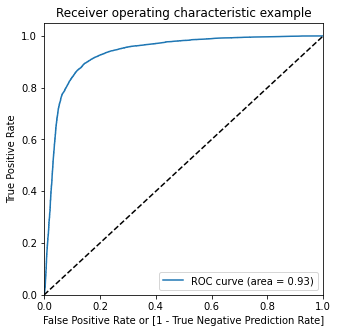

In [113]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.033446,0,1,0,0,0,0,0,0,0,0,0
1,0,0.605060,1,1,1,1,1,1,1,1,0,0,0
2,0,0.873697,1,1,1,1,1,1,1,1,1,1,0
3,0,0.000018,0,1,0,0,0,0,0,0,0,0,0
4,0,0.118847,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.754693     0.979899     0.529487
0.2          0.2  0.810024     0.963520     0.656528
0.3          0.3  0.842888     0.947354     0.738421
0.4          0.4  0.862696     0.926722     0.798671
0.5          0.5  0.872880     0.899069     0.846690
0.6          0.6  0.872587     0.855092     0.890082
0.7          0.7  0.859373     0.793619     0.925126
0.8          0.8  0.811220     0.666738     0.955703
0.9          0.9  0.685828     0.396065     0.975592


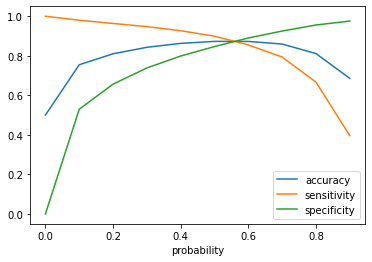

In [116]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimm point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**


In [117]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.033446,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.605060,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2,0,0.873697,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,0,0.000018,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.118847,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.872880     0.899069     0.846690
0.51         0.51  0.873837     0.895347     0.852327
0.52         0.52  0.874209     0.892529     0.855889
0.53         0.53  0.874369     0.888700     0.860037
0.54         0.54  0.873677     0.883861     0.863494
0.55         0.55  0.873278     0.878649     0.867907
0.56         0.56  0.873332     0.874448     0.872215
0.57         0.57  0.873943     0.870513     0.877373
0.58         0.58  0.874049     0.866206     0.881893
0.59         0.59  0.873252     0.860729     0.885775


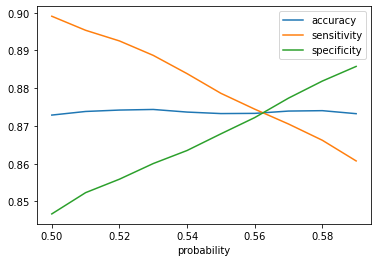

In [119]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [120]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.033446,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.605060,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0.873697,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0.000018,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.118847,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.873677213507046


In [122]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16238  2567]
 [ 2184 16621]]


In [123]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8838606753523
Specificity =  0.8634937516617921
False Positive Rate =  0.13650624833820793
Precision =  0.8662184698770065
True Negative Prediction Rate =  0.8814460970578656


#### Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

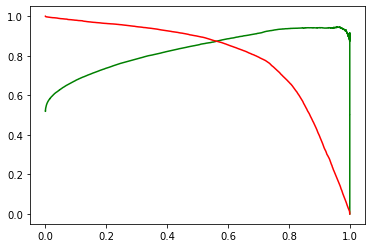

In [125]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

**Transforming and feature selection for test data**

In [126]:
# Scaling the test data
X_test[num_col] = scaler.fit_transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
89007,0.018322,0.004216,0.000933,0.005652,0.040461,0.023269,0.031043,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,1,0,0
78088,0.012518,0.002982,0.003997,0.001453,0.003534,0.008242,0.020791,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
78311,0.007941,0.000000,0.000000,0.000380,0.000344,0.000384,0.001254,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
14354,0.019416,0.000000,0.000000,0.001488,0.000769,0.001266,0.019480,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
92687,0.014413,0.017402,0.007151,0.004948,0.255584,0.048538,0.062905,0.0,0.012666,0.007765,...,0,0,0,1,0,0,0,0,0,0


In [127]:
# Feature selection
X_test1=X_test[rfe_columns_1]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
89007,0.018322,0.004216,0.000933,0.005652,0.040461,0.023269,0.031043,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,1,0,0
78088,0.012518,0.002982,0.003997,0.001453,0.003534,0.008242,0.020791,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
78311,0.007941,0.000000,0.000000,0.000380,0.000344,0.000384,0.001254,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
14354,0.019416,0.000000,0.000000,0.001488,0.000769,0.001266,0.019480,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
92687,0.014413,0.017402,0.007151,0.004948,0.255584,0.048538,0.062905,0.0,0.012666,0.007765,...,0,0,0,1,0,0,0,0,0,0


In [128]:
# Adding constant to the test model.
X_test1_SM = sm.add_constant(X_test1)

### **Predicting the target variable**

In [129]:
y_test_pred = res.predict(X_test1_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 89007    1.318684e-01
78088    3.125308e-01
78311    4.608681e-01
14354    6.961809e-02
92687    1.804508e-01
66026    5.602225e-01
90024    1.572566e-01
50306    1.665803e-07
20986    3.231264e-06
55481    9.704842e-01
dtype: float64


In [130]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
89007,0.131868
78088,0.312531
78311,0.460868
14354,0.069618
92687,0.180451


In [131]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [132]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
89007,0
78088,0
78311,0
14354,0
92687,0


In [133]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
89007,0,0.131868
78088,0,0.312531
78311,0,0.460868
14354,0,0.069618
92687,0,0.180451


In [134]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
89007,0,0.131868,0
78088,0,0.312531,0
78311,0,0.460868,0
14354,0,0.069618,0
92687,0,0.180451,0


In [135]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.6439860055495235

**Metrics Evaluation**

In [136]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[5122 2941]
 [  10  216]]


In [137]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.9557522123893806
Specificity =  0.635247426516185
False Positive Rate =  0.36475257348381496
Precision =  0.06841938549255623
True Negative Prediction Rate =  0.9980514419329696


### Explaining the results


In [139]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  64.0 %
The sensitivity of the predicted model is:  96.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



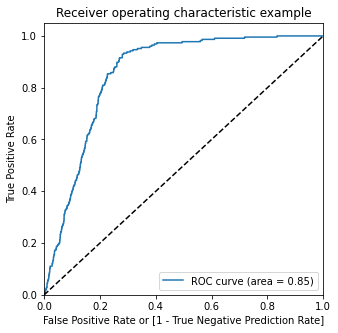

In [140]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**The AUC score for train dataset is 0.93 and the test dataset is 0.85.<br> This model can be considered as a good model.**

**The recall score for train dataset is 0.88 and the test dataset is 0.95.<br> This model can be considered as a good model.**

In [141]:
from sklearn.metrics import classification_report

## Using DecisionTree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
dt = DecisionTreeClassifier(random_state=42)

### Hyper-parameter tuning


In [145]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
}

In [146]:
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=4, n_jobs=-1, verbose=1, scoring = "f1")

In [147]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1)

In [148]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=1)

## DT model evaluation

In [149]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.395951,0.007628,0.013466,0.001116,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
1,0.391714,0.006852,0.012966,0.001866,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
2,0.389219,0.008652,0.013464,0.002865,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
3,0.388721,0.006402,0.015709,0.003821,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
4,0.384482,0.007677,0.012718,0.002042,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17


In [150]:
?GridSearchCV


In [151]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,0.582958,0.004145,0.014960,0.003074,3,100,"{'max_depth': 3, 'min_samples_leaf': 100}",0.974767,0.973320,0.976215,0.975801,0.975026,0.001117,1
12,0.993123,0.055805,0.016208,0.002675,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.976629,0.973733,0.975388,0.974147,0.974974,0.001133,2
5,0.550543,0.009409,0.011719,0.000826,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3
6,0.553037,0.005012,0.013465,0.002685,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3
7,0.560517,0.009746,0.011720,0.000827,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3


In [152]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, random_state=42)

In [153]:
grid_search.best_score_

0.9750258531540849

In [154]:
cv_df = pd.DataFrame(grid_search.cv_results_)

In [155]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.395951,0.007628,0.013466,0.001116,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
1,0.391714,0.006852,0.012966,0.001866,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
2,0.389219,0.008652,0.013464,0.002865,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
3,0.388721,0.006402,0.015709,0.003821,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17
4,0.384482,0.007677,0.012718,0.002042,2,100,"{'max_depth': 2, 'min_samples_leaf': 100}",0.971458,0.971251,0.973733,0.972285,0.972182,0.000976,17


In [156]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,0.582958,0.004145,0.014960,0.003074,3,100,"{'max_depth': 3, 'min_samples_leaf': 100}",0.974767,0.973320,0.976215,0.975801,0.975026,0.001117,1
12,0.993123,0.055805,0.016208,0.002675,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.976629,0.973733,0.975388,0.974147,0.974974,0.001133,2
5,0.550543,0.009409,0.011719,0.000826,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3
6,0.553037,0.005012,0.013465,0.002685,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3
7,0.560517,0.009746,0.011720,0.000827,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.974147,0.973320,0.974974,0.975181,0.974405,0.000737,3


In [157]:
sel_cols = ['param_max_depth','param_min_samples_leaf','params', 'rank_test_score',  'mean_test_score']

In [158]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_min_samples_leaf,params,rank_test_score,mean_test_score
9,3,100,"{'max_depth': 3, 'min_samples_leaf': 100}",1,0.975026
12,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",2,0.974974
5,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",3,0.974405
6,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",3,0.974405
7,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",3,0.974405
8,3,50,"{'max_depth': 3, 'min_samples_leaf': 50}",3,0.974405
11,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",7,0.974302
13,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",8,0.973113
14,5,100,"{'max_depth': 5, 'min_samples_leaf': 100}",9,0.973061
10,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",10,0.973009


In [159]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [160]:
dt_best = grid_search.best_estimator_

In [161]:
y_train_pred = dt_best.predict(X_train)

In [162]:
y_test_pred = dt_best.predict(X_test)

In [163]:
print(classification_report(y_train_sm, dt_best.predict(X_train_sm)))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74     18805
           1       0.97      0.32      0.49     18805

    accuracy                           0.66     37610
   macro avg       0.78      0.66      0.61     37610
weighted avg       0.78      0.66      0.61     37610



In [164]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8063
           1       0.49      0.40      0.44       226

    accuracy                           0.97      8289
   macro avg       0.74      0.70      0.71      8289
weighted avg       0.97      0.97      0.97      8289



In [165]:
accuracy_score(y_train, y_train_pred)

0.9753360910031024

In [166]:
accuracy_score(y_test, y_test_pred)

0.9723730244902883

## Model building using random forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)

In [169]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

**Performance on the train set**

In [170]:
y_train_pred = rf.predict(X_train_sm)

In [171]:
accuracy_score(y_train_sm, y_train_pred)

0.9999734113267748

**Performance on unseen data**

In [172]:
y_test_pred = rf.predict(X_test)

In [173]:
accuracy_score(y_test, y_test_pred)

0.9673060682832669

## Model evaluation: Cross validation

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
cross_val_score(logreg, X_train_sm, y_train_sm, cv=5, n_jobs=-1)

array([0.87569795, 0.87303909, 0.86905078, 0.8718426 , 0.87915448])

In [176]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)

array([0.97388831, 0.97673216, 0.97569804, 0.97595657, 0.97492244])

In [177]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9754395036194415

**Takeaway: Cross validation score gives a far more reliable estimate of the generalized perforance on unseen data**

**Note**: OOB Score in RandomForest is somewhat similar to cross val score

In [178]:
rf.oob_score_

0.9848710449348578

**Scoring methods in Cross val score**

In [179]:
import sklearn

In [180]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [181]:
cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring="recall")

array([0.28971963, 0.29906542, 0.27102804, 0.28037383, 0.30841121])

## Hyper-parameter tuning using Cross Validation

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [185]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [5, 10, 15, 20, 25],
               }

In [186]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=4,
             n_jobs=-1)

In [187]:
model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20, 25]},
             verbose=1)

In [188]:
model_cv.best_score_

0.9756980351602896

In [189]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_features=20, n_jobs=-1, random_state=42)

In [190]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [191]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.865069,0.049079,0.147612,0.038485,3,5,"{'max_depth': 3, 'max_features': 5}",0.972492,0.972285,0.972285,0.972285,0.972337,0.000090,25
1,2.648247,0.336151,0.451806,0.256562,3,10,"{'max_depth': 3, 'max_features': 10}",0.972699,0.972492,0.972285,0.972285,0.972441,0.000171,24
2,3.846610,0.404642,0.511897,0.433350,3,15,"{'max_depth': 3, 'max_features': 15}",0.974974,0.973733,0.973940,0.973113,0.973940,0.000670,22
3,5.314245,0.282341,0.433822,0.314524,3,20,"{'max_depth': 3, 'max_features': 20}",0.975801,0.974560,0.975801,0.974767,0.975233,0.000573,4
4,6.972424,0.241449,0.514390,0.174633,3,25,"{'max_depth': 3, 'max_features': 25}",0.976008,0.974354,0.975801,0.975181,0.975336,0.000644,3


In [192]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
8,7.665250,0.478193,1.212794,0.495204,5,20,"{'max_depth': 5, 'max_features': 20}",0.976215,0.974974,0.976215,0.975388,0.975698,0.000537,1
14,15.288124,0.974776,1.217032,0.456852,10,25,"{'max_depth': 10, 'max_features': 25}",0.975801,0.973733,0.975801,0.976836,0.975543,0.001127,2
4,6.972424,0.241449,0.514390,0.174633,3,25,"{'max_depth': 3, 'max_features': 25}",0.976008,0.974354,0.975801,0.975181,0.975336,0.000644,3
9,18.247529,1.410493,1.487362,0.234299,5,25,"{'max_depth': 5, 'max_features': 25}",0.975595,0.974354,0.975181,0.975801,0.975233,0.000554,4
16,6.381816,0.531366,1.223453,0.348345,15,10,"{'max_depth': 15, 'max_features': 10}",0.975595,0.974354,0.975595,0.975388,0.975233,0.000514,4


In [197]:
sel_cols = ['param_max_depth','param_max_features',  'mean_test_score']

In [198]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

,param_max_depth,param_max_features,mean_test_score
8,5,20,0.975698
14,10,25,0.975543
4,3,25,0.975336
9,5,25,0.975233
16,15,10,0.975233
3,3,20,0.975233
18,15,20,0.975233
21,20,10,0.975181
10,10,5,0.975129
19,15,25,0.975129


### Understand better the effect of Hyper-parameter

In [199]:
cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

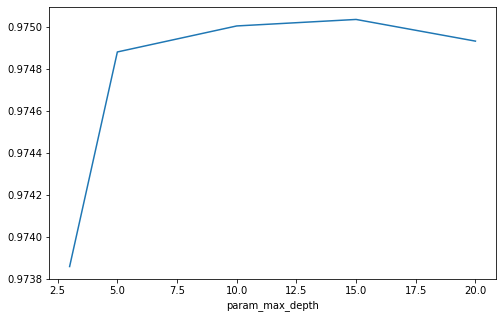

In [201]:
cv_df.groupby('param_max_depth')[ 'mean_test_score'].mean().plot(figsize=[8,5])
plt.show()

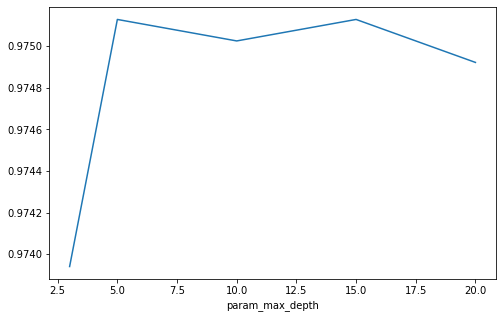

In [202]:
cv_df.groupby('param_max_depth')[ 'mean_test_score'].agg(np.median).plot(figsize=[8,5])
plt.show()

### Extracting the best model and asessing test performance


In [205]:
model_cv.best_score_

0.9756980351602896

In [215]:
rf_best1 = model_cv.best_estimator_

In [216]:
rf_best1

RandomForestClassifier(max_depth=5, max_features=20, n_jobs=-1, random_state=42)

In [217]:
cross_val_score(rf_best1, X_train_sm, y_train_sm, cv=5, n_jobs=-1, scoring="recall")

array([0.98511034, 0.99787291, 0.99468227, 0.99388461, 0.99521404])

In [224]:
y_test_pred = rf_best1.predict(X_test)

In [225]:
accuracy_score(y_test, y_test_pred)

0.9730968753770056

In [229]:
print(classification_report(y_train_sm, rf_best1.predict(X_train_sm)))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74     18805
           1       0.98      0.30      0.46     18805

    accuracy                           0.65     37610
   macro avg       0.79      0.65      0.60     37610
weighted avg       0.79      0.65      0.60     37610



In [230]:
print(classification_report(y_test, rf_best1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8063
           1       0.51      0.34      0.41       226

    accuracy                           0.97      8289
   macro avg       0.75      0.67      0.70      8289
weighted avg       0.97      0.97      0.97      8289



##  Final Choice of Model

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

- Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.



- From the Tree Family, the Decision Tree overfitted the data slightly while obtaining good recall accuracy on test data. The Random Forest avoided overfitting but obtained pretty good recall accuracy on test data and avoided overfittig.

## Identifying relevant churn features.


We will use an instance of Random Forest classifier to identify the features most relevant to churn.



## Random Forest for churn driver features

In [231]:
rf1 = RandomForestClassifier(max_depth=5,
                            max_features=20,
                            min_samples_leaf=100,
                            random_state=42)
rf1.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=100,
                       random_state=42)

<AxesSubplot:>

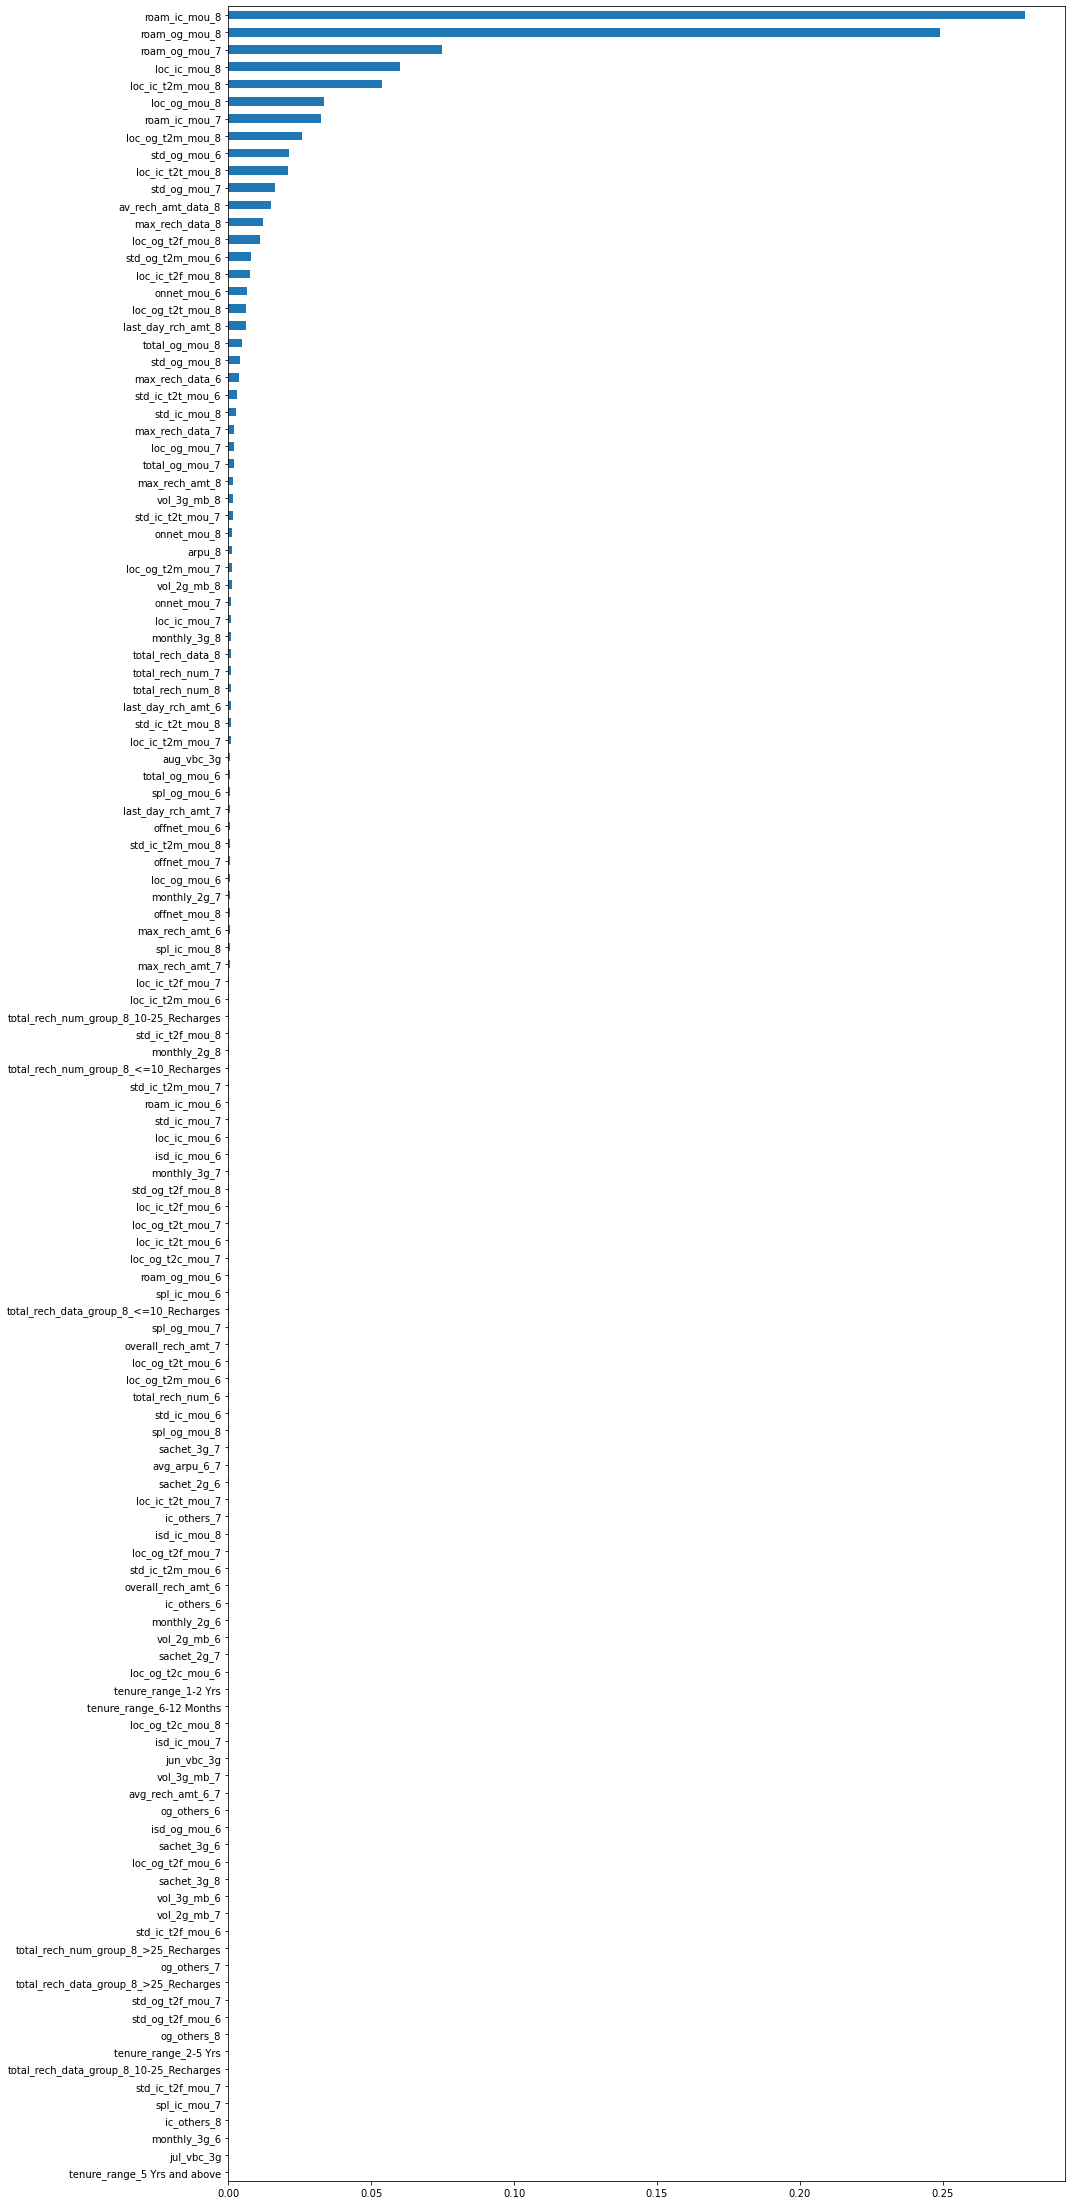

In [232]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [233]:
rf1.feature_importances_

array([1.46754186e-03, 6.66269630e-03, 1.11210808e-03, 1.47892317e-03,
       5.87965652e-04, 5.71791752e-04, 5.44769865e-04, 3.40797977e-04,
       3.24851018e-02, 2.78816859e-01, 2.29924093e-04, 7.48290008e-02,
       2.49078629e-01, 1.70542011e-04, 2.68963122e-04, 6.36382268e-03,
       1.61178140e-04, 1.46350924e-03, 2.58720897e-02, 3.40971040e-06,
       9.72258273e-05, 1.12033145e-02, 6.02799308e-05, 2.39304147e-04,
       3.42883569e-05, 5.51729796e-04, 2.01717050e-03, 3.35650921e-02,
       8.04434847e-03, 0.00000000e+00, 0.00000000e+00, 2.87879052e-04,
       2.11232967e-02, 1.62828550e-02, 4.16915942e-03, 6.89580742e-06,
       6.44914529e-04, 1.89705069e-04, 1.49970582e-04, 8.75740296e-06,
       0.00000000e+00, 0.00000000e+00, 6.73047598e-04, 1.96206278e-03,
       4.79418333e-03, 2.66078551e-04, 1.04375702e-04, 2.08996349e-02,
       3.91172858e-04, 8.18551593e-04, 5.39648994e-02, 2.75450335e-04,
       4.35648781e-04, 7.65698315e-03, 3.19322622e-04, 1.04758144e-03,
      

In [234]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf1.feature_importances_
})

In [235]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
9,roam_ic_mou_8,0.278817
12,roam_og_mou_8,0.249079
11,roam_og_mou_7,0.074829
56,loc_ic_mou_8,0.060186
50,loc_ic_t2m_mou_8,0.053965
...,...,...
121,total_rech_num_group_8_>25_Recharges,0.000000
30,std_og_t2f_mou_7,0.000000
29,std_og_t2f_mou_6,0.000000
124,tenure_range_2-5 Yrs,0.000000


Some of the top main predictiors of churn are the monthly KPI features for the action phase.

the graph above suggest that the top 25 features ranked in order of importance as produced by our RandomForest implementation are the features that belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers. Specifically, these features are as follows in below graph:

<AxesSubplot:>

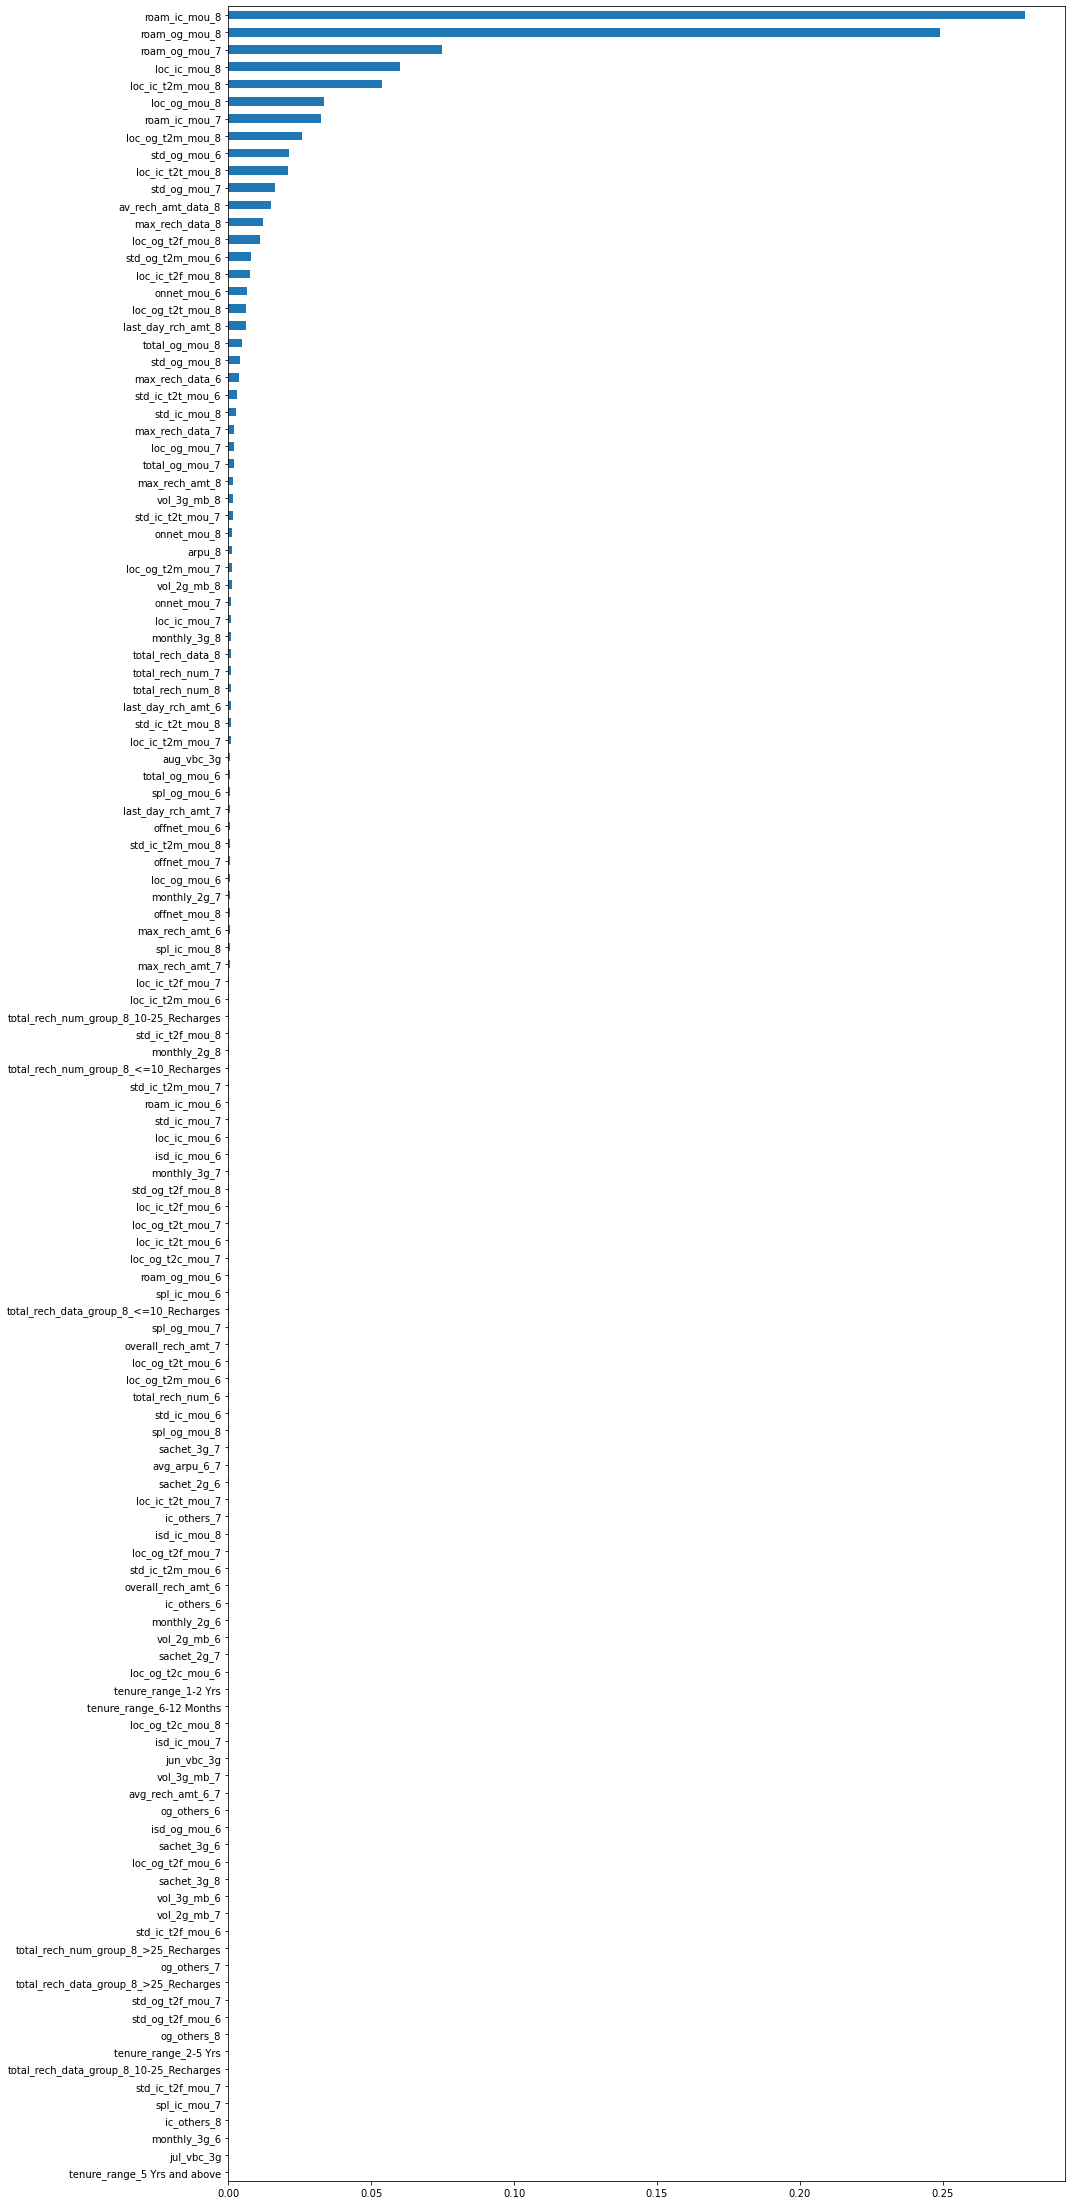

In [236]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

1. roam_ic_mou_8
2. roam_og_mou_8
3. roam_og_mou_7
4. loc_ic_mou_8
5. loc_ic_t2m_mou_8

These are main kKPI is signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

Overall, drop in any of these indicator KPI is a signal that the customer is not actively engaging in the services offered by the Network operator and thus may choose to churn in the near future.

## Business Insights

#### Stratergy suggestions,

- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
- The company needs to focus on the STD and LOC rates. Perhaps, the rates are too high. Provide them with some kind of STD and LOC packages.
- To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.




- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like,
- Discounted roaming rates during particular hours of the day.
- Free monthly roaming mou's depending on the users past roaming mou usage.